In [ ]:
# 1. Import thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [ ]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH-USD-2.csv')
df1=df.reset_index()['Close']

In [ ]:
#đảo ngược dữ liệu
# df1=df1[::-1]

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
#in shape của từng tập dư liệu
print(train_data.shape, test_data.shape, val_data.shape)

#in head
print(df1[:5])


(930, 1) (465, 1) (156, 1)
[[0.00770764]
 [0.01073007]
 [0.00947408]
 [0.01063114]
 [0.0108556 ]]


In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#in shape của từng tập dư liệu
print(X_train.shape, y_train.shape, X_val.shape, yval.shape, X_test.shape, ytest.shape)


(879, 50) (879,) (105, 50) (105,) (414, 50) (414,)


In [ ]:
# # 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape, X_val.shape)

(879, 50, 1) (414, 50, 1) (105, 50, 1)


In [ ]:
#in dữ liệu
print(X_train[:1])

[[[7.70763875e-03]
  [1.07300741e-02]
  [9.47407656e-03]
  [1.06311386e-02]
  [1.08555984e-02]
  [1.13033056e-02]
  [1.00187777e-02]
  [9.73421685e-03]
  [9.82842335e-03]
  [5.11728420e-03]
  [4.88853304e-03]
  [4.55252083e-03]
  [2.62610009e-03]
  [5.21150366e-03]
  [3.71688165e-03]
  [4.03856709e-03]
  [4.07995888e-03]
  [3.49968745e-03]
  [4.24503406e-03]
  [3.17352409e-03]
  [2.68134069e-03]
  [3.01903191e-03]
  [2.74395370e-03]
  [2.72489475e-03]
  [2.51575357e-03]
  [2.53920461e-03]
  [1.88420389e-03]
  [4.36462934e-04]
  [2.25788685e-04]
  [9.28771027e-04]
  [5.36523218e-04]
  [6.53096542e-04]
  [1.25223447e-03]
  [6.28217582e-04]
  [6.98091265e-04]
  [6.17777337e-04]
  [8.15685077e-05]
  [0.00000000e+00]
  [3.12953414e-03]
  [3.16418888e-03]
  [4.30609934e-03]
  [3.56089357e-03]
  [3.83150045e-03]
  [3.82753130e-03]
  [3.58039670e-03]
  [3.73125706e-03]
  [3.97763309e-03]
  [6.17381930e-03]
  [8.82902007e-03]
  [8.66923809e-03]]]


In [ ]:
# 8. Define CNN Model
# # Define the model


from keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model.add(Flatten())

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=5) sẽ dừng lại khi val_loss không còn giảm nữa sau 5 lần lặp, monitor là giá trị để theo dõi, ở đây là val_loss
#verbose=1 sẽ in ra thông tin khi dừng lại




In [ ]:
#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape, X_val.shape)

(879, 50, 1) (414, 50, 1) (105, 50, 1)


In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,yval),epochs=150,batch_size=16,verbose=1,callbacks=[early_stop])

Epoch 1/150
55/55 [==============================] - 2s 8ms/step - loss: 0.0075 - val_loss: 0.0021
Epoch 2/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 7.2243e-04
Epoch 3/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 9.6375e-04
Epoch 5/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 7.2139e-04
Epoch 6/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 7/150
55/55 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 6.4423e-04
Epoch 8/150
55/55 [==============================] - 0s 4ms/step - loss: 8.4075e-04 - val_loss: 0.0015
Epoch 9/150
55/55 [==============================] - 0s 4ms/step - loss: 7.9490e-04 - val_loss: 9.9659e-04
Epoch 10/150
55/55 [==============================] - 0s 4ms/step - loss: 7.6294e

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

#in shape của từng tập dư liệu
print(train_predict.shape, y_pred.shape, y_pred_val.shape)

4/4 [==============================] - 0s 3ms/step
(879, 1) (414, 1) (105, 1)


In [ ]:
#in shape của từng tập dư liệu y real
print(y_train.shape, ytest.shape, yval.shape)


(879,) (414,) (105,)


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

#in head
print(train_predict[:5])

[[160.16315]
 [163.48355]
 [165.9475 ]
 [169.62381]
 [172.53943]]


In [ ]:
#Chuẩn hóa ngược lại yval và ytest và y_train sau khi đã reshape
y_train = y_train.reshape(y_train.shape[0],1)
ytest = ytest.reshape(ytest.shape[0],1)
yval = yval.reshape(yval.shape[0],1)

y_train=scaler.inverse_transform(y_train)
ytest=scaler.inverse_transform(ytest)
yval=scaler.inverse_transform(yval)

#in head
print(y_train[:5])



[[149.554337]
 [146.130844]
 [149.092453]
 [158.795425]
 [135.852661]]


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
print('Train Mean Squared Error:', math.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Squared Error:', math.sqrt(mean_squared_error(ytest[:,0], y_pred[:,0])))
print('Val Mean Squared Error:', math.sqrt(mean_squared_error(yval[:,0], y_pred_val[:,0])))
print('Train Score: %.2f RMSE' % (math.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0]))))
print('Test Score: %.2f RMSE' % (math.sqrt(mean_squared_error(ytest[:,0], y_pred[:,0]))))
print('Val Score: %.2f RMSE' % (math.sqrt(mean_squared_error(yval[:,0], y_pred_val[:,0]))))
print('Train Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_train[:,0], train_predict[:,0]))
print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(ytest[:,0], y_pred[:,0]))
print('Val Mean Absolute Percentage Error:', mean_absolute_percentage_error(yval[:,0], y_pred_val[:,0]))
print('Train Score: %.2f MAPE' % (mean_absolute_percentage_error(y_train[:,0], train_predict[:,0])))
print('Test Score: %.2f MAPE' % (mean_absolute_percentage_error(ytest[:,0], y_pred[:,0])))
print('Val Score: %.2f MAPE' % (mean_absolute_percentage_error(yval[:,0], y_pred_val[:,0])))



Train Mean Squared Error: 99.8318906942917
Test Mean Squared Error: 233.90686753737546
Val Mean Squared Error: 172.10911926799477
Train Score: 99.83 RMSE
Test Score: 233.91 RMSE
Val Score: 172.11 RMSE
Train Mean Absolute Percentage Error: 0.0887652770743866
Test Mean Absolute Percentage Error: 0.09991133159802726
Val Mean Absolute Percentage Error: 0.109024257821694
Train Score: 0.09 MAPE
Test Score: 0.10 MAPE
Val Score: 0.11 MAPE


In [ ]:
# Chuẩn bị dữ liệu cho dự đoán tiếp theo
last_30_days = df1[-100:]
next_30_days = []


for i in range(30):
    # Tạo input sequence
    input_sequence = last_30_days[-time_step:]
    
    input_sequence = np.array(input_sequence)

    # Chuẩn hóa dữ liệu
    # input_sequence = scaler.transform(input_sequence.reshape(-1, 1))

    # Reshape lại dữ liệu
    input_sequence = input_sequence.reshape(1, input_sequence.shape[0], 1)
    print(input_sequence.shape)

    # Dự đoán giá tiếp theo
    next_day = model.predict(input_sequence)
    
    # Lưu giá dự đoán
    next_30_days.append(next_day[0][0])

    # Cập nhật input sequence
    last_30_days = np.append(last_30_days, next_day[0][0])

    # Xóa đi phần tử đầu tiên
    last_30_days = np.delete(last_30_days, 0)

    

# Đưa giá trở lại dạng ban đầu
# next_30_days = scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))


(1, 50, 1)
1/1 [==============================] - 0s 25ms/step
(1, 50, 1)
1/1 [==============================] - 0s 28ms/step
(1, 50, 1)
1/1 [==============================] - 0s 26ms/step
(1, 50, 1)
1/1 [==============================] - 0s 28ms/step
(1, 50, 1)
1/1 [==============================] - 0s 31ms/step
(1, 50, 1)
1/1 [==============================] - 0s 30ms/step
(1, 50, 1)
1/1 [==============================] - 0s 37ms/step
(1, 50, 1)
1/1 [==============================] - 0s 32ms/step
(1, 50, 1)
1/1 [==============================] - 0s 31ms/step
(1, 50, 1)
1/1 [==============================] - 0s 25ms/step
(1, 50, 1)
1/1 [==============================] - 0s 24ms/step
(1, 50, 1)
1/1 [==============================] - 0s 25ms/step
(1, 50, 1)
1/1 [==============================] - 0s 24ms/step
(1, 50, 1)
1/1 [==============================] - 0s 37ms/step
(1, 50, 1)
1/1 [==============================] - 0s 24ms/step
(1, 50, 1)
1/1 [==============================] - 0s 32

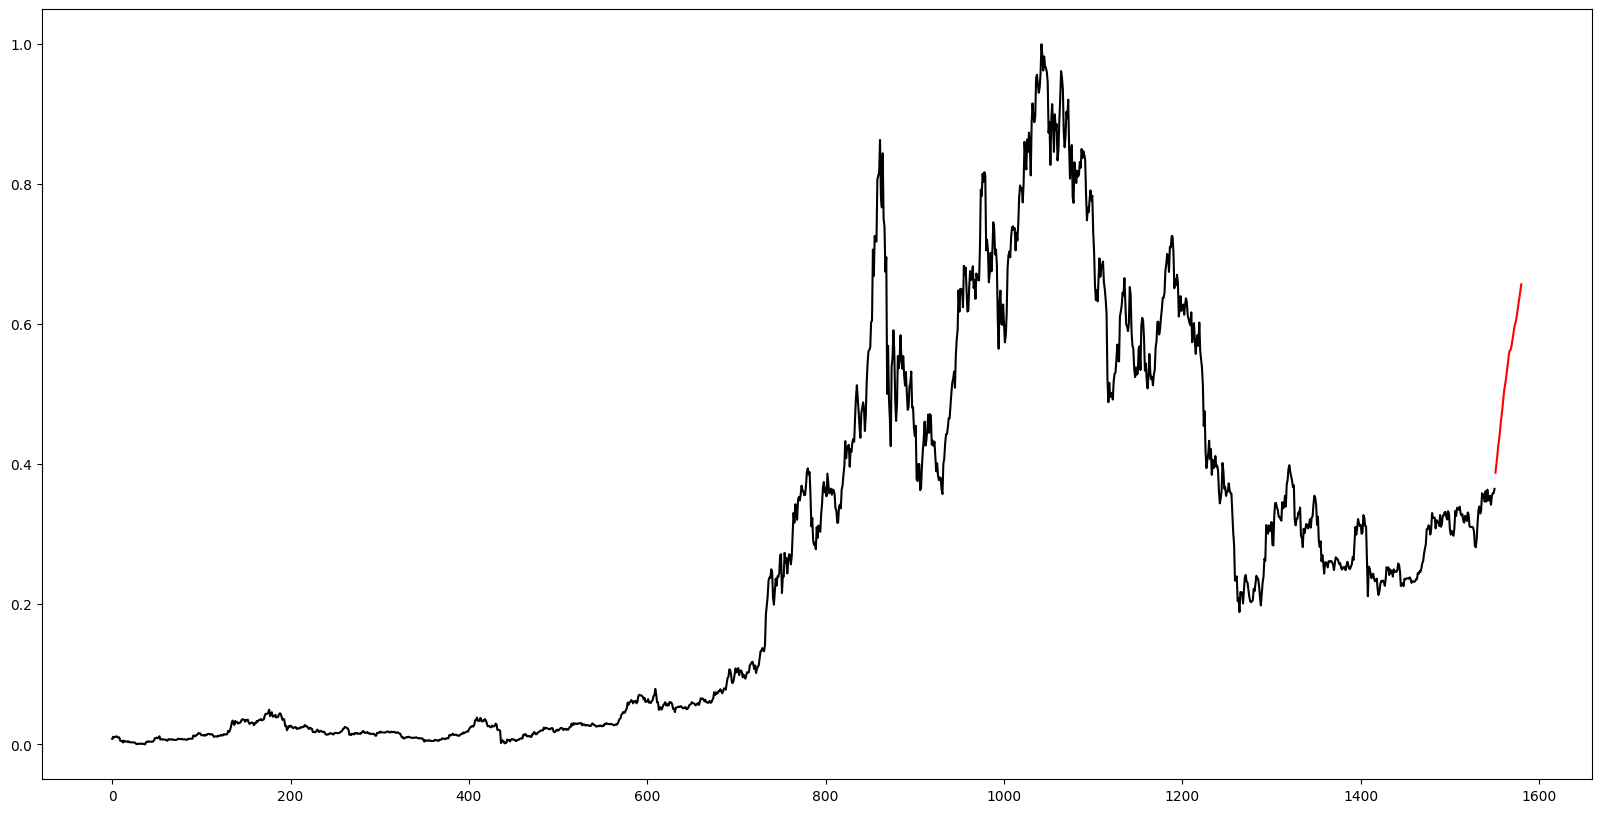

In [ ]:
# Tạo mảng index tương ứng với các ngày
days = np.array(range(len(df), len(df) + len(next_30_days)))

# Vẽ biểu đồ
plt.figure(figsize=(20,10))
plt.plot(days, next_30_days, c='r', label='Next 30 days')
plt.plot(df1, c='black', label='Real data')
plt.show()


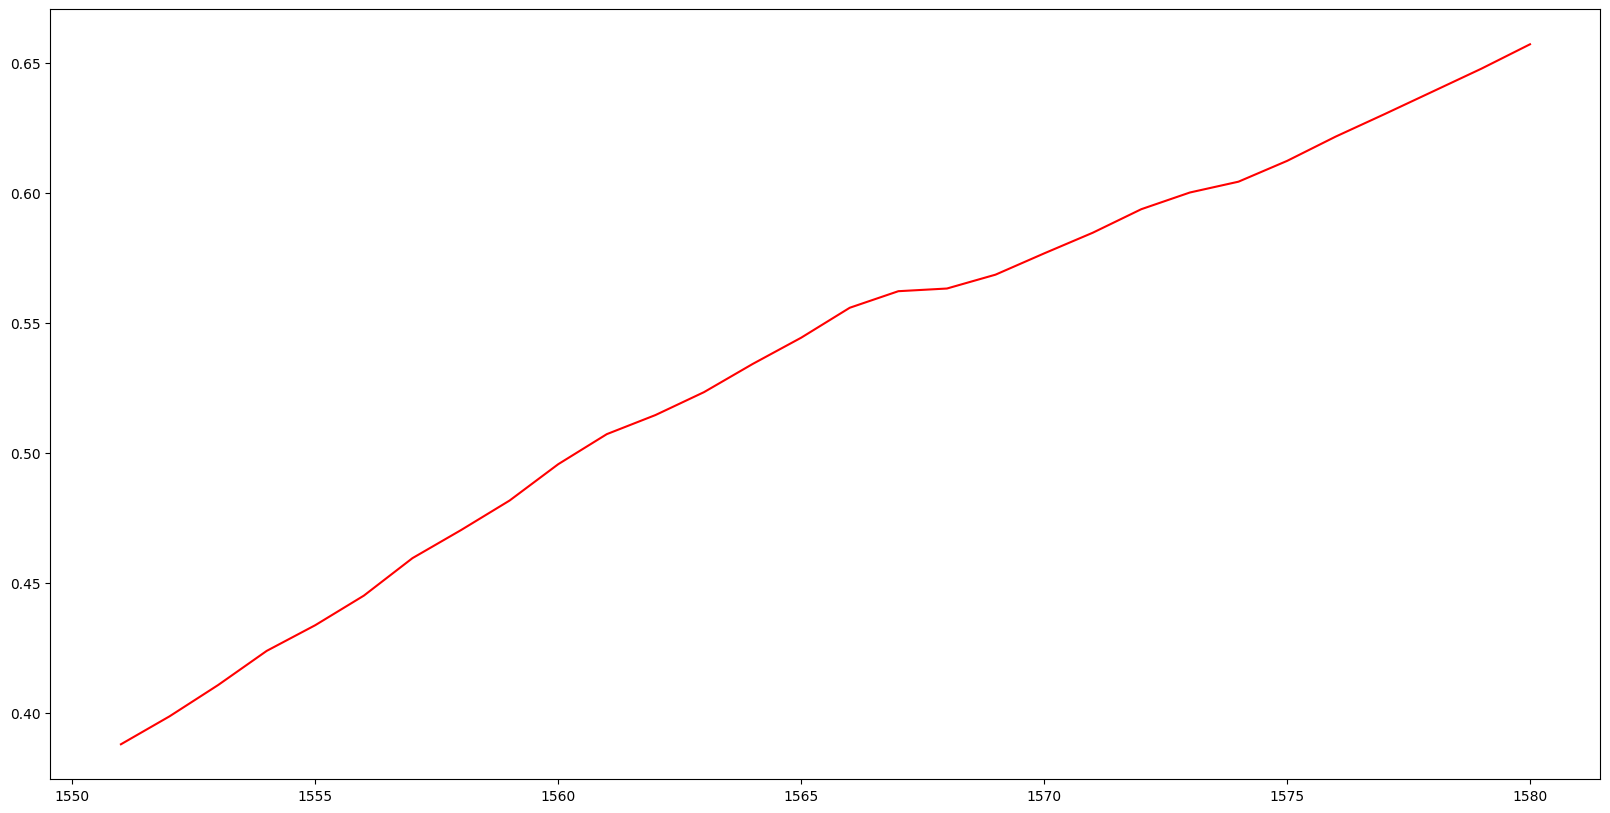

In [ ]:
#vẽ next 30 days
plt.figure(figsize=(20,10))
plt.plot(days, next_30_days, c='r', label='Next 30 days')
plt.show()

In [ ]:
train_data_inverse=scaler.inverse_transform(np.array(train_data).reshape(-1, 1))
test_data_inverse=scaler.inverse_transform(np.array(test_data).reshape(-1, 1))
val_data_inverse=scaler.inverse_transform(np.array(val_data).reshape(-1, 1))
next_30_days_inverse=scaler.inverse_transform(np.array(next_30_days).reshape(-1, 1))

# in dữ liệu
print(train_data_inverse[:5])
print(test_data_inverse[:5])
print(val_data_inverse[:5])
print(next_30_days_inverse[:5])

[[140.819412]
 [155.047684]
 [149.13501 ]
 [154.58194 ]
 [155.638596]]
[[1817.296631]
 [1787.510742]
 [1990.970825]
 [2025.202759]
 [2124.776611]]
[[1514.374878]
 [1555.477905]
 [1619.698486]
 [1590.783325]
 [1572.714478]]
[[1931.1128]
 [1981.6721]
 [2038.3086]
 [2100.122 ]
 [2146.654 ]]


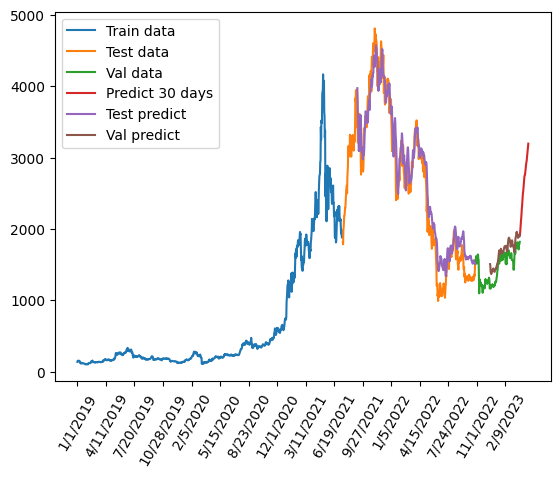

In [ ]:
#vẽ y_train nối với ytest và y_val với index tương ứng

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
predict30_data_index = pd.RangeIndex(start=train_size+test_size+val_size, stop=train_size+test_size+val_size+30, step=1)

train_predict_index = pd.RangeIndex(start=0, stop=train_predict.shape[0], step=1)
y_pred_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0], step=1)
y_pred_val_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+(val_size-y_pred_val.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+y_pred_val.shape[0]+(val_size-y_pred_val.shape[0]), step=1)

plt.plot(train_data_index, train_data_inverse,  label='Train data')
plt.plot(test_data_index, test_data_inverse, label='Test data')
plt.plot(val_data_index, val_data_inverse,  label='Val data')
plt.plot(predict30_data_index, next_30_days_inverse, label='Predict 30 days')
plt.plot(y_pred_index, y_pred, label='Test predict')
plt.plot(y_pred_val_index, y_pred_val,  label='Val predict')
# trục x là giá trị của cột Close time của df1
plt.xticks(np.arange(0, len(df1), 100), df['Date'][0:len(df):100])
#xoay ngang giá trị của trục x
plt.xticks(rotation=60)
plt.legend()
plt.show()



